# Prediction de la quantité de CO2 Dégagée auprés des véhicules 

# Introduction


-Les pollutions sont de différents types. Les voitures et camions rejettent dans l'atmosphère des oxydes d'azote,
destructeurs de l'ozone, diverses substances volatiles cancérigènes et de grandes quantités de dioxyde de carbone (C02), 
le principal des gaz responsables de l'effet de serre.

-Le transport représente 26% des émissions de CO2 dans l'Union européenne. Et, au sein de ce secteur, 
la route concentre 85% du total des rejets de dioxyde de carbone. Dans les années 80, pourtant, 
une petite lueur d'espoir était apparue : grâce à des normes plus strictes imposées aux 
constructeurs automobiles, ces rejets tendirent à diminuer. Mais cet effet a été contrebalancé par le goût 
des consommateurs pour des voitures toujours plus puissantes, et donc plus gourmandes en énergie, tandis que
le trafic routier ne cessait de croître.



# Problématique 


Au cours de ce projet on va essayer de créer un algorithme qui permet de mesurer la quantité du dioxyde de carbone (CO2) 
dégagée par les véhicules selon certaines caractéristiques de ces derniers .


#  Description des données

Dans ce projet je vais utiliser une base de données contenant 55044 Observations (lignes)
Les colones sont composées de 10 variables dont 7 sont numériques : 
puiss_admin_98: nbre de chevaux des vehicules*
puiss_max : puissance maximale mesurée en KM/H*
conso_mixte : qté de carburant consommée mesurée par L/100km*
co2:Dioxyde de carbone mesuré par Gramme/km*
co_typ_1 : monoxyde de carbone G/km*
nox : netrogene oxyde g/km*
masse_ordma_max : masse des vehicules par KG*
malus : Taxe à payer en Euro*
Et 3 autres variables catégoriques:
Vehicule : Marque et modéle* 
cod_cbr : type de carburant*
hybride:Un véhicule hybride est un véhicule faisant appel à plusieurs sources d'énergie distinctes pour se mouvoir. 

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [4]:
#############################IMPORTATION DE NOTRE BASE DE DONNEES  ########################################



data = pd.read_csv('vehicules1.csv')
data.head()


ParserError: Error tokenizing data. C error: Expected 1 fields in line 6, saw 2


In [3]:
############################## VERIFICATION DES DONNEES #############################################


data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55044 entries, 0 to 55043
Data columns (total 11 columns):
Vehicule           55044 non-null object
cod_cbr            55044 non-null object
hybride            55044 non-null int64
puiss_admin_98     55044 non-null int64
puiss_max          55044 non-null float64
conso_mixte        55044 non-null float64
co2                55044 non-null int64
co_typ_1           55044 non-null float64
nox                55044 non-null float64
masse_ordma_max    55044 non-null int64
malus              55044 non-null int64
dtypes: float64(4), int64(5), object(2)
memory usage: 4.6+ MB


In [4]:
data.describe()

,hybride,puiss_admin_98,puiss_max,conso_mixte,co2,co_typ_1,nox,masse_ordma_max,malus
count,55044.000000,55044.000000,55044.000000,55044.000000,55044.000000,55044.000000,55044.000000,55044.000000,55044.000000
mean,0.007067,10.551504,118.984916,7.760036,201.582443,0.180488,0.298301,2341.021801,9293.272491
std,0.083769,5.126021,45.417430,1.394649,34.333517,0.145129,0.416653,424.067895,3132.689974
min,0.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,825.000000,-6000.000000
25%,0.000000,9.000000,100.000000,7.300000,193.000000,0.061000,0.197000,2075.000000,10500.000000
50%,0.000000,10.000000,120.000000,7.800000,205.000000,0.137000,0.214000,2355.000000,10500.000000
75%,0.000000,10.000000,120.000000,8.300000,216.000000,0.296000,0.228000,2709.000000,10500.000000
max,1.000000,81.000000,585.000000,24.500000,572.000000,0.968000,1.846000,3094.000000,10500.000000


In [5]:
#1ERE COLONE :

# LA PREMIERE COLONE N'EST PAS VRAIMENT BENEFIQUE POUR PUISQUE LES VALEURS SONT SOIT 0 SOIT 1 , MAIS ON PEUT EN CONCLURE QUE
#75% OU + DE NOTRE BASE DONNEES NE SONT PAS HYBRIDE.

#2EME COLONE /

#LE NOMBRE DE CHEVAUX DES VEHICULES VARIE ENTRE UN INTERVALLE = [1,81]
#lA MOYENNE DE NOMBRE DES CHEVAUX EST EGALE A 10.55

#3EME COLONE /

#LA PUISSANCE MAXIMALE FLUCTUE AUTOUR D'UNE MOYENNE EGALE A 118 KM PAR HEURE
# LE MAXIMUM DE PUISSANCE MAXIMALE EST EGALE A 585 KM/H 
# LE MINIMUM EST EGAL A 10km/h qui est une voiture électrique "MIA_mia L 4PL et 3 PL "


#4eme colone :
#LA consommation mixte varie entre [0,24.5] selon une moyenne egale à 7.76 L/100km



In [6]:
data.isnull().sum()

Vehicule           0
cod_cbr            0
hybride            0
puiss_admin_98     0
puiss_max          0
conso_mixte        0
co2                0
co_typ_1           0
nox                0
masse_ordma_max    0
malus              0
dtype: int64

En utilisant cette commande on verifie si on a des NAN (des valeurs manquantes ) DANS NOTRE CAS IL N'Y ON A PAS , s'il y avait on pouvait utiliser la commande dropna pour les corrigés selon la méthode qui 
convient (moyenne , mediane ...)

In [7]:




############################################ DATA VISUALIZATION ##########################################################

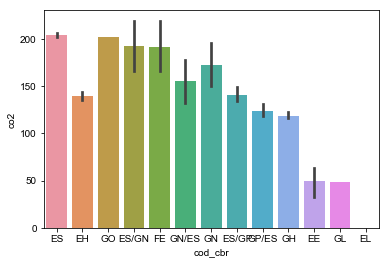

In [8]:
# Maintenant on va voir l'impact du type du carburant sur l'émission du CO2

sns.barplot(data['cod_cbr'],data['co2'])
sns.set(rc={'figure.figsize':(15,10)})

In [9]:
data['cod_cbr'].value_counts()

GO       49311
ES        5169
EH         298
GH          81
EL          34
ES/GN       32
GN/ES       32
GP/ES       23
ES/GP       23
GN          21
FE          10
EE           9
GL           1
Name: cod_cbr, dtype: int64

 D'aprés les deux commandes précédentes , on remarque que la plupart de nos données ont GASOIL comme type de carburant , et c'est le type qui dégage le plus de co2 avec l'essence du coups on constate que le type de carburant peut être une cause importante de notre probléme.

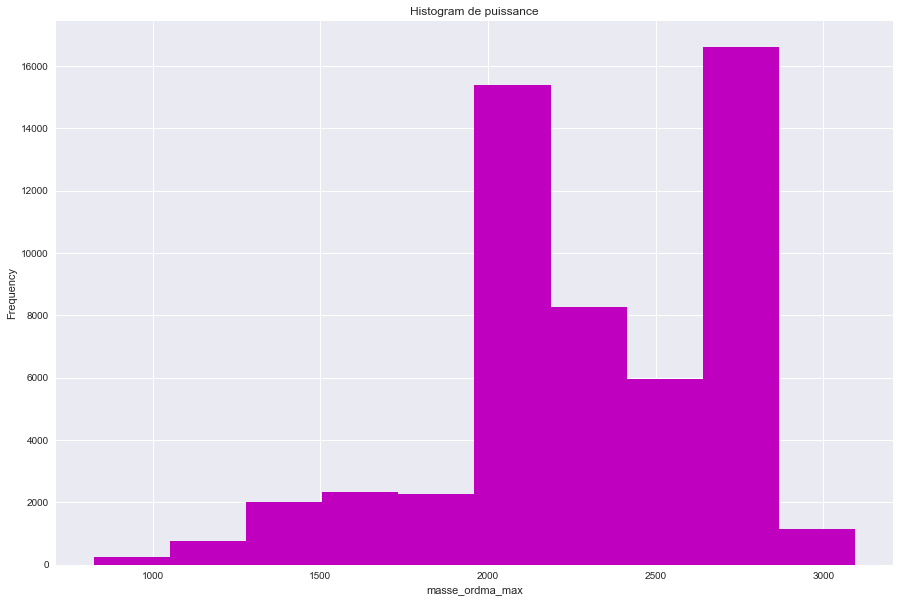

In [10]:
# distribution de la masse
data.masse_ordma_max.hist(color='m')
plt.title('Histogram de puissance')
plt.xlabel('masse_ordma_max')
plt.ylabel('Frequency')
plt.savefig('hist_puiss')

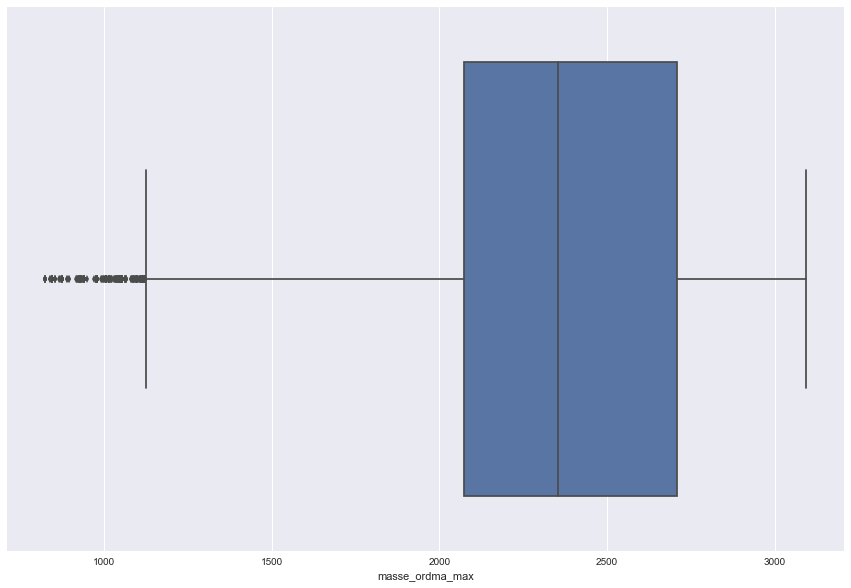

In [11]:
>>> ax = sns.boxplot(x=data["masse_ordma_max"])

LA masse des véhicules est bornée entre [2000,2700] mais il y a ici des données abérantes qui sortent du boxplot qui sont inferieur à 1000 Kg

C:\Users\SOS110518\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


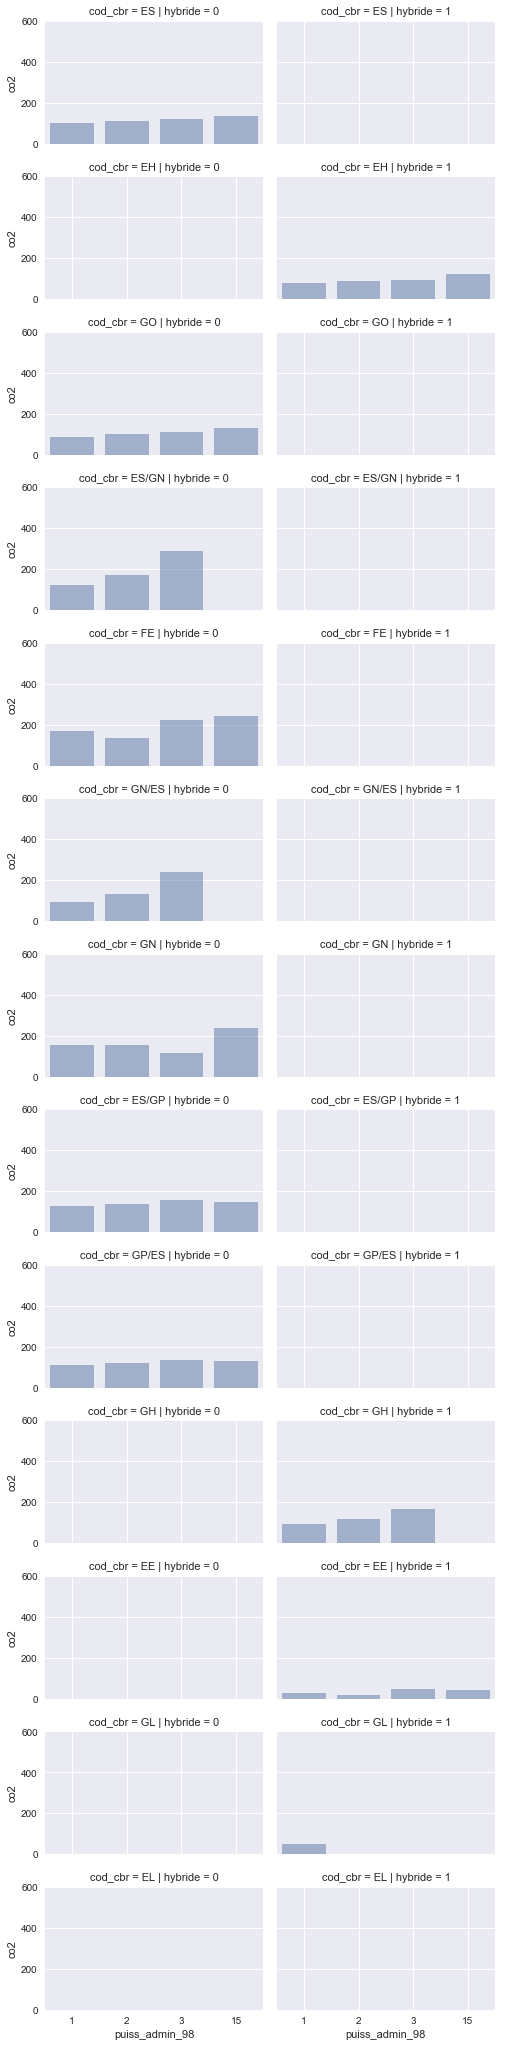

In [12]:
grid = sns.FacetGrid(data, row='cod_cbr', 
    col='hybride', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'puiss_admin_98', 'co2', alpha=.5, 
    ci=None)
grid.add_legend()

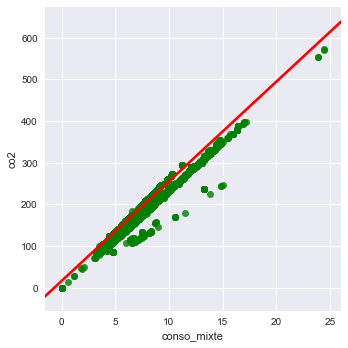

In [13]:
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
g = sns.lmplot(x="conso_mixte", y="co2", data=data,
               y_jitter=.02,palette=cmap,line_kws={'color': 'red'},scatter_kws={'color' : 'green'})


On remarque que la Qté dégagée du CO2 augmente lorsque la consommation mixte elle aussi augmente . Reste à voir les exceptions 

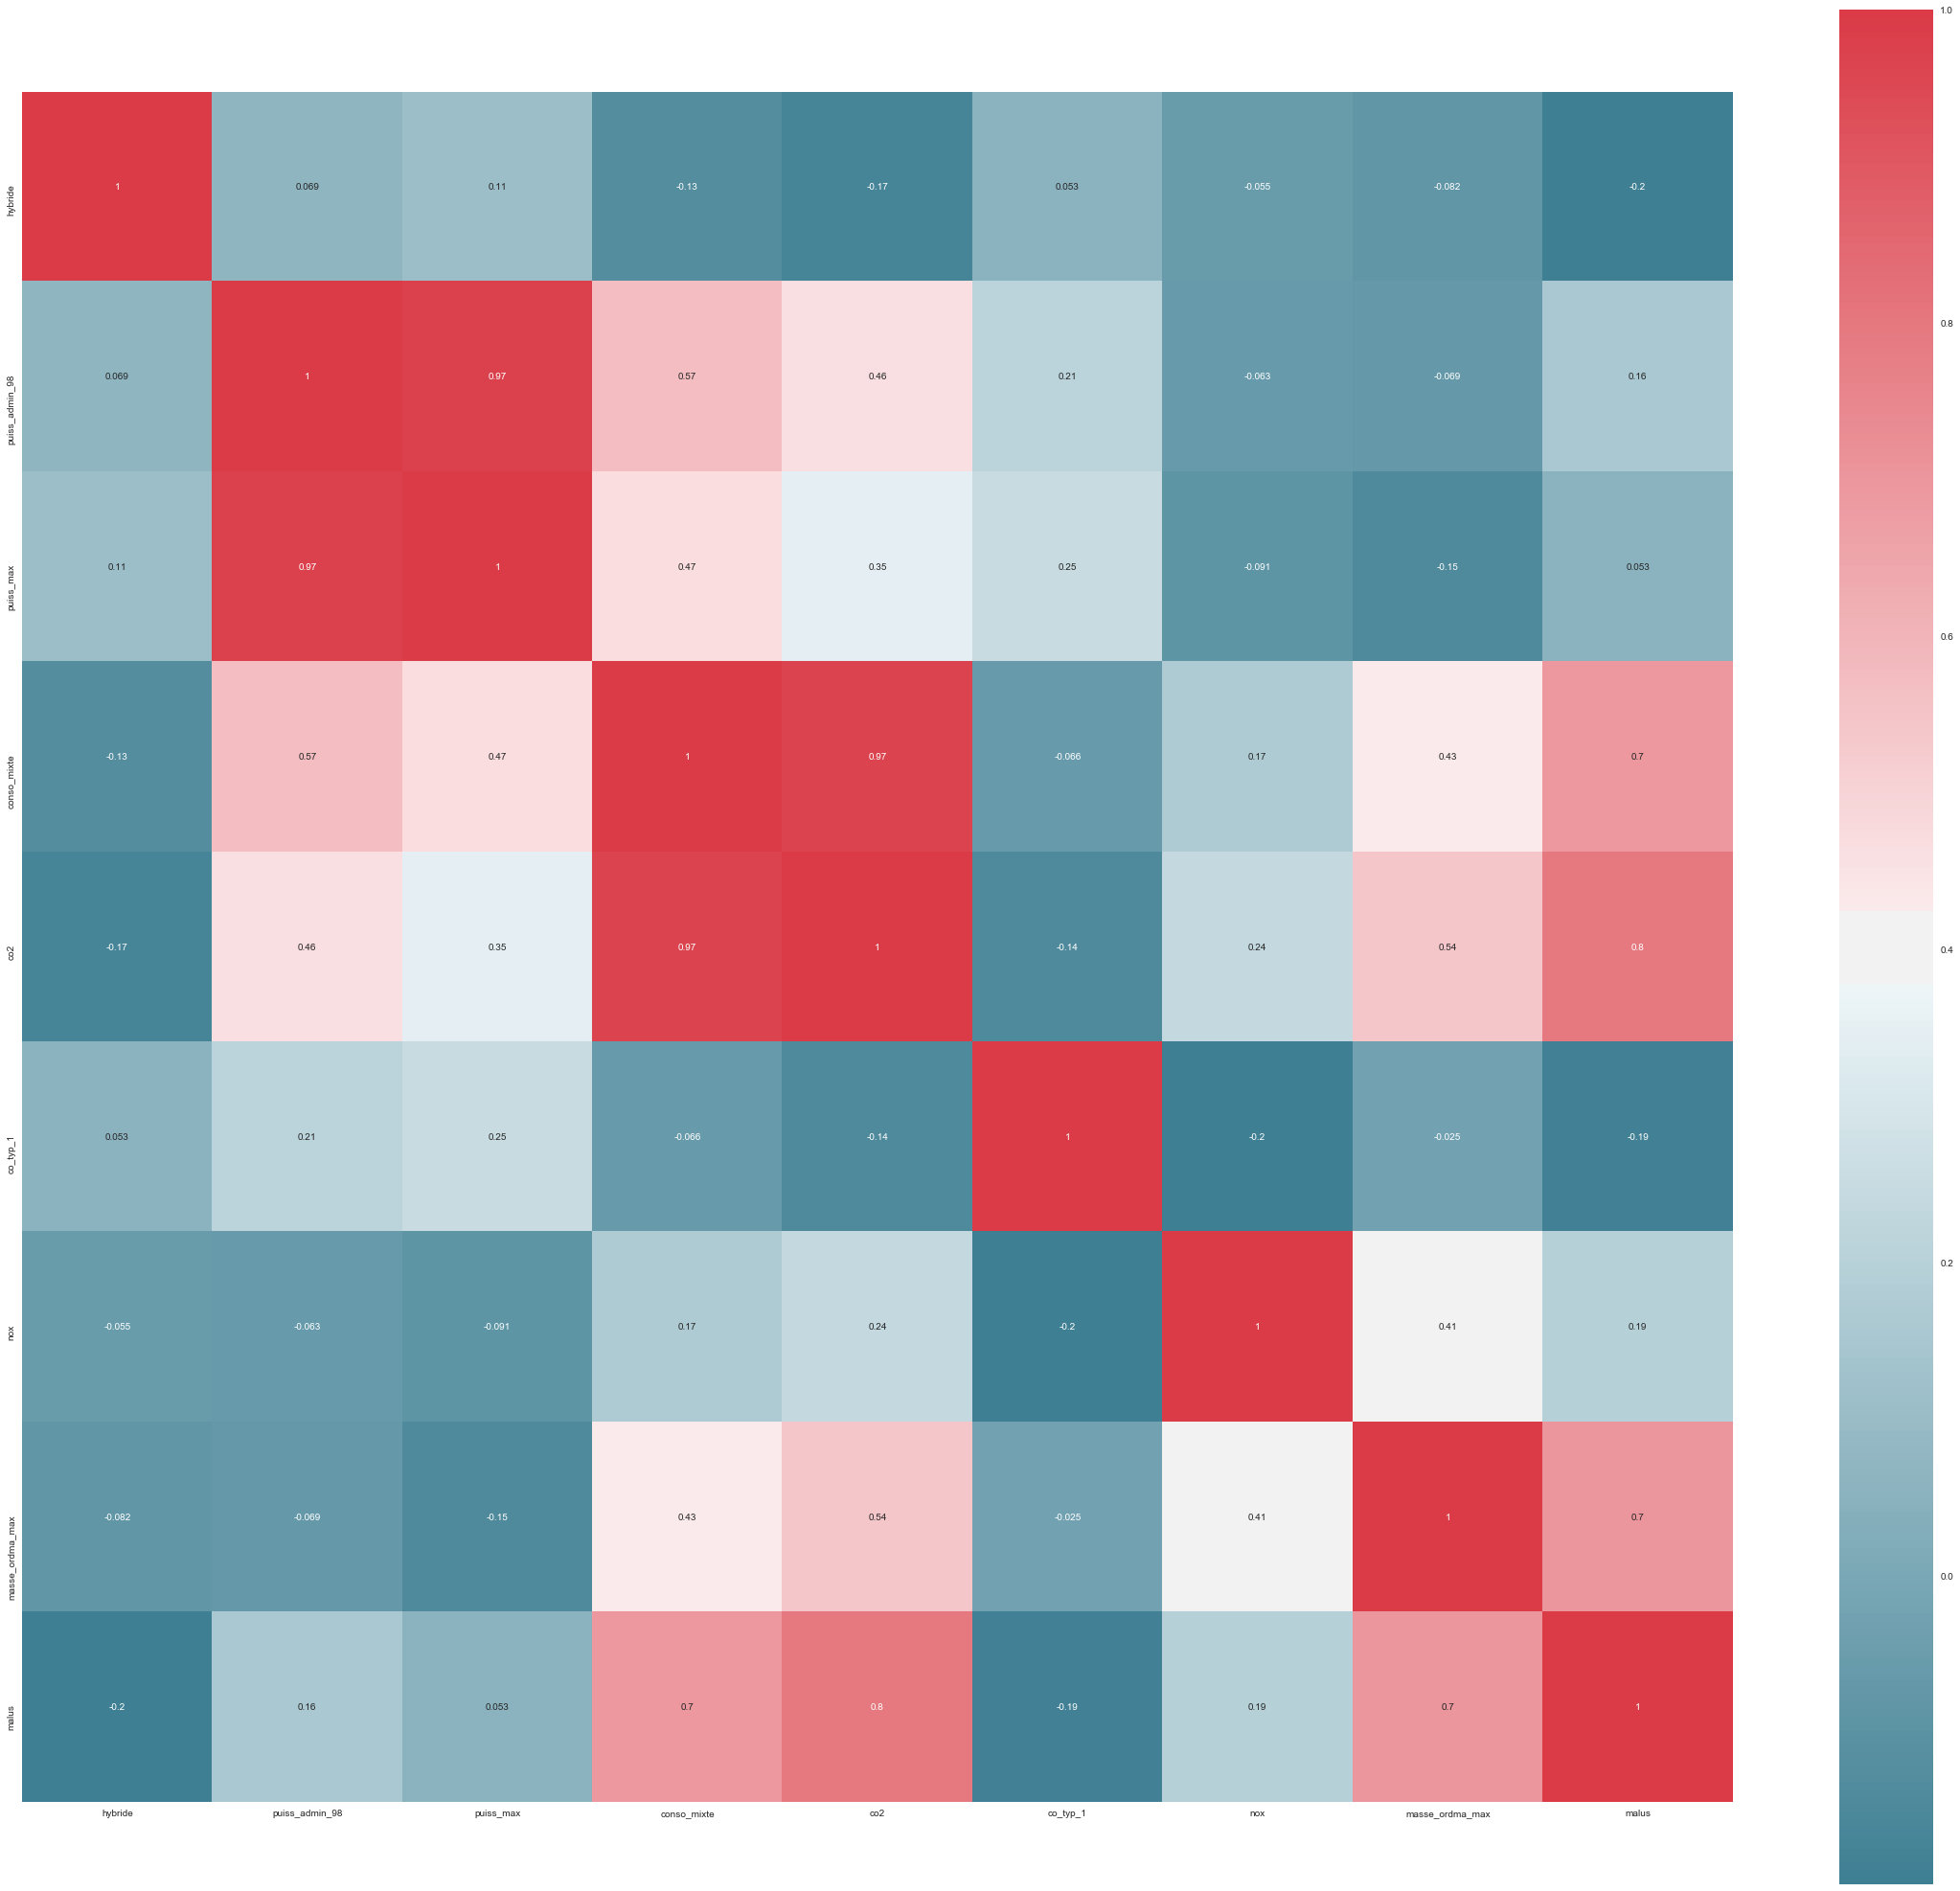

In [14]:
def plot_correlation_map ():
    corr = data.corr ()
    s, ax = plt.subplots (figsize = (40, 40))
    cmap = sns.diverging_palette (220, 10, as_cmap = True)
    s = sns.heatmap (corr, cmap = cmap,square = True, cbar_kws = {'shrink': .9},ax = ax, annot = True, annot_kws = {'fontsize': 10})

plot_correlation_map()

# MODELING




 DANS CETTE PARTIE NOTRE OUTPUT RESTERA TOUJOURS LE CO2 
ON VA COMMENCER PAR TESTER DE REGRESSER LES INPUTS SUIVANTS :
X=['co_typ_1','masse_ordma_max','hybride','puiss_admin_98']
on va appliquer la regression lineaire :


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler()
from sklearn.linear_model import LinearRegression
y=data.co2
x=data[['co_typ_1','masse_ordma_max','hybride','puiss_admin_98']]
x_=Scaler.fit(x)
x_=Scaler.transform(x)
reg = LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x_,y,test_size=0.3)

In [16]:
 reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
reg.score(x_test,y_test)

0.6229104554639937

AU COURS DE CE PREMIER TEST , ON A UN SCORE QUI EST EGAL A 62% , C'EST A DIRE 62% DES DONNEES PREDITES PAR LE MODELES SONT
correctes CE QUI N'EST PAS MAL MAIS QUI NECESSITE QUELQUES MODIFICATIONS POUR AVOIR UN MEILLEUR RESULTAT DU COUPS ON VA ESSAYER 
LA REGRESSION POLYNOMIALE

In [18]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(x)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
pol_reg.score(X_poly,y)

0.711842661598943

Jusque là on a déja pu avoir un meilleur resultat du à la regression polynomiale de degré 2
on est passé de 62% à 71% ,Mais , on peut faire mieux puisque d'aprés la data viz on a remarqué que le type du carburant influe enormement sur le co2 . 

In [20]:
############################################# TESTER LA RANDOM FOREST ######################################################

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics


X=data[['co_typ_1','masse_ordma_max','hybride','puiss_admin_98']] 
y=data['co2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6189899479229745


In [21]:
dict={'GO':0,'ES':0,'EH':2,'GH':2,'EL':3,'ES/GN':1,'GN/ES':1,'ES/GP':2,'GP/ES':2,'GN':1,'FE':2,'EE':3,'GL':2}
data['Carb']=data['cod_cbr'].map(dict)

In [22]:
data.head()

,Vehicule,cod_cbr,hybride,puiss_admin_98,puiss_max,conso_mixte,co2,co_typ_1,nox,masse_ordma_max,malus,Carb
0,ASTON MARTIN_ONE-77_M10SCFVP000Y155,ES,0,81,559.299988,24.500000,572,0.782,0.049,1815,10500,0
1,ASTON MARTIN_ONE-77_M10SCFVP000Z156,ES,0,81,559.299988,24.500000,572,0.782,0.049,1815,10500,0
2,ASTON MARTIN_ONE-77_M10SCFVP000R087,ES,0,80,559.299988,23.900000,555,0.903,0.056,1815,10500,0
3,ASTON MARTIN_ONE-77_M10SCFVP000S088,ES,0,80,559.299988,23.900000,555,0.903,0.056,1815,10500,0
4,LAMBORGHINI_VENENO_M10LBGVP000D820,ES,0,74,545.000000,17.200001,398,0.870,0.002,1640,10500,0


In [23]:
data.isnull().sum()

Vehicule           0
cod_cbr            0
hybride            0
puiss_admin_98     0
puiss_max          0
conso_mixte        0
co2                0
co_typ_1           0
nox                0
masse_ordma_max    0
malus              0
Carb               0
dtype: int64

In [24]:
xx=data[['Carb','co_typ_1','masse_ordma_max','hybride','puiss_admin_98']] 
y=data['co2']

X_train, X_test, y_train, y_test = train_test_split(xx, y, test_size=0.3) 

clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6151750030277341


In [25]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=8)
XX_poly = poly_reg.fit_transform(xx)
pol_reg = LinearRegression()
pol_reg.fit(XX_poly, y)
pol_reg.score(XX_poly,y)


0.777542495864038

In [26]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=100)

model.fit(data[['Carb','co_typ_1','masse_ordma_max','hybride','puiss_admin_98']] ,data.co2)
model.score(data[['Carb','co_typ_1','masse_ordma_max','hybride','puiss_admin_98']] ,data.co2)


0.5019438994259138

 Aprés toutes les méthodes utilisées j'ai conclue que la polynomial regression de degré 8 est celle qui convient le mieux à notre 
cas ; donc je vais maintenant ajouter comme input la consommation mixte et voir ce que ça donne . 

In [27]:
from sklearn.preprocessing import PolynomialFeatures
xy=data[['Carb','co_typ_1','masse_ordma_max','hybride','puiss_admin_98','conso_mixte']] 
y=data['co2']
poly_reg = PolynomialFeatures(degree=8)
XY_poly = poly_reg.fit_transform(xy)
pol_reg = LinearRegression()
pol_reg.fit(XY_poly, y)
pol_reg.score(XY_poly,y)


0.9871480770617788

# CONCLUSION 

D'aprés tout ce qu'on a vu on peut finir par conclure que la consommation dU véhicule est ce qui impacte le plus sur l'émission
DU co2 (ce qui est logique ), Mais aussi le type d'énergie utilisé . Du coups notre modéle peut être écrit de la maniére suivante .
#Y = a1 * conso_mixte + a2* masse_ordma_max + a3* hybride + a4*puiss_admin_98 + a5*Carb + a6 * Co_typ_1

In [29]:
pol_reg.coef_

array([-3.97569362e-14, -7.56368290e-13, -1.45346409e-15, ...,
        1.28327185e-16,  4.50353410e-17,  1.61175910e-17])

In [30]:
pol_reg.intercept_

98.0705911298538